# Bussiness Problem
- Build and deploy a machine learning model to predict customer churn for a
subscription-based service.

In [126]:
# import basic libaries
import pandas as pd
import numpy as np
# import visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [129]:
# load the dataset
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Understanding

In [131]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df.shape

(7043, 21)

In [135]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [137]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [139]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
# Drop the customerID column as it is not required for modeling
df=df.drop(columns=['customerID'])

In [143]:
# Summary Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [145]:
# Check for missing values
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [149]:
df['TotalCharges'].isnull().sum()

0

In [151]:
# unique values in all the columns
continous=['tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
    if col not in continous:
        print(col,df[col].unique())
        print('*'*50)
        
        

gender ['Female' 'Male']
**************************************************
SeniorCitizen [0 1]
**************************************************
Partner ['Yes' 'No']
**************************************************
Dependents ['No' 'Yes']
**************************************************
PhoneService ['No' 'Yes']
**************************************************
MultipleLines ['No phone service' 'No' 'Yes']
**************************************************
InternetService ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity ['No' 'Yes' 'No internet service']
**************************************************
OnlineBackup ['Yes' 'No' 'No internet service']
**************************************************
DeviceProtection ['No' 'Yes' 'No internet service']
**************************************************
TechSupport ['No' 'Yes' 'No internet service']
**************************************************
StreamingTV ['No' 'Yes' 'No internet 

Text(0.5, 1.0, 'tenure Distribution')

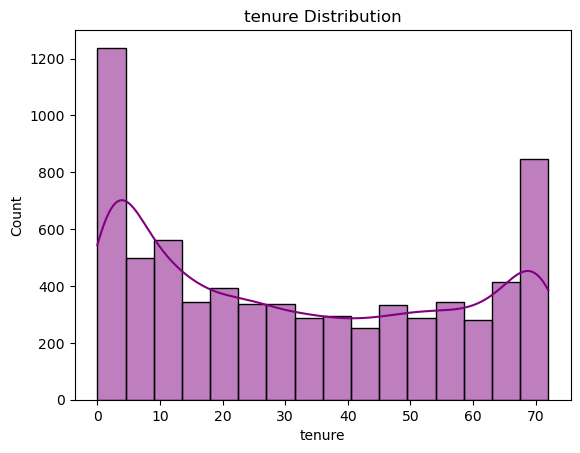

In [153]:
sns.histplot(df['tenure'], kde=True, color="purple")
plt.title('tenure Distribution')

Text(0.5, 1.0, 'MonthlyCharges Distribution')

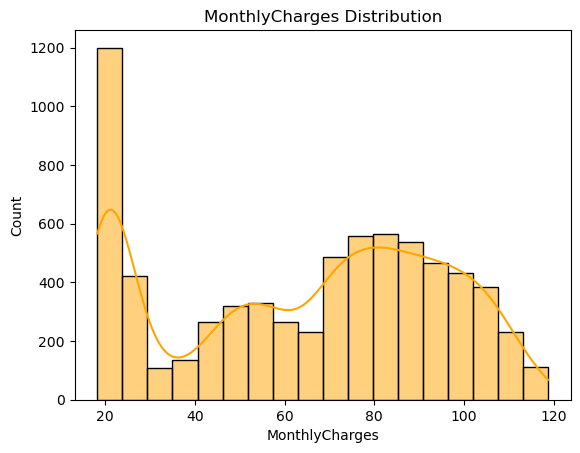

In [155]:
sns.histplot(df['MonthlyCharges'], kde=True, color="orange")
plt.title('MonthlyCharges Distribution')

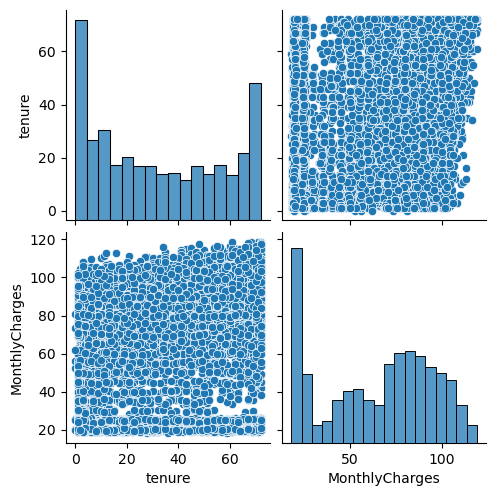

In [159]:
# Pairplot to show relationships between all continuous variables
sns.pairplot(df[continous])
plt.show()

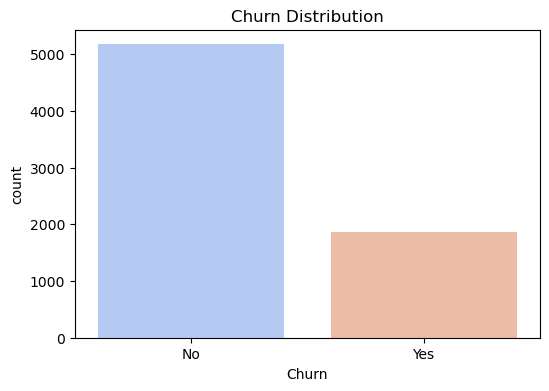

In [160]:
# Visualize Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

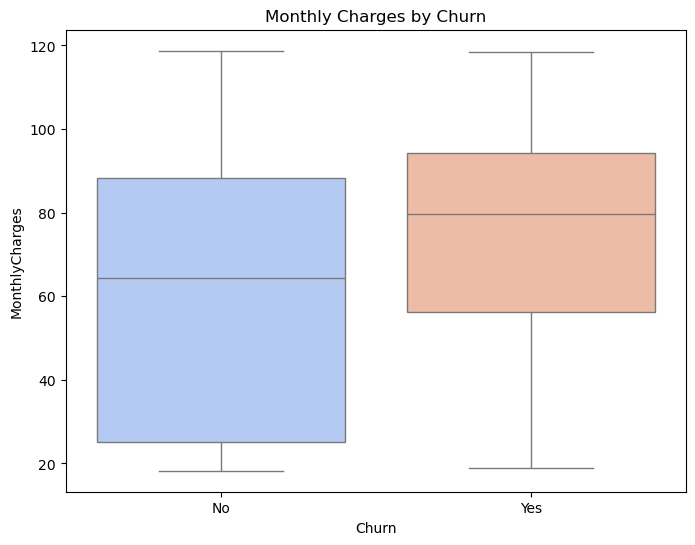

In [163]:
# Distribution of Monthly Charges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title("Monthly Charges by Churn")
plt.show()

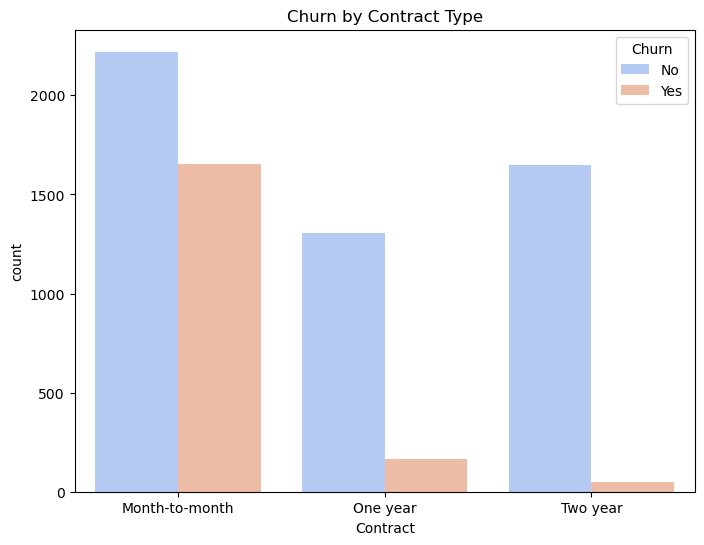

In [165]:
# Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

In [168]:
# Heatmap of Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[continous].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: ' '

<Figure size 1000x800 with 0 Axes>

In [170]:
df[continous].corr()

ValueError: could not convert string to float: ' '

# Data Preprocessing
####  1. Handle missing values


In [173]:
df['TotalCharges']=df['TotalCharges'].replace({" ":"0.0"})
df['TotalCharges']=df['TotalCharges'].astype(float)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### 2.Encoding

In [178]:
# label Encoding of traget columns
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})

In [180]:
#label Encoding

categorical_variable=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
# Apply Label Encoding to each column in Discreate_categorical
for column in categorical_variable:
    df[column] = label_encoder.fit_transform(df[column])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### 3.feature scaling
- Normalize features like tenure, MonthlyCharges, and TotalCharges for better model performance.

In [183]:
continous=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[continous] = scaler.fit_transform(df[continous])

# Exploratory Data Analysis

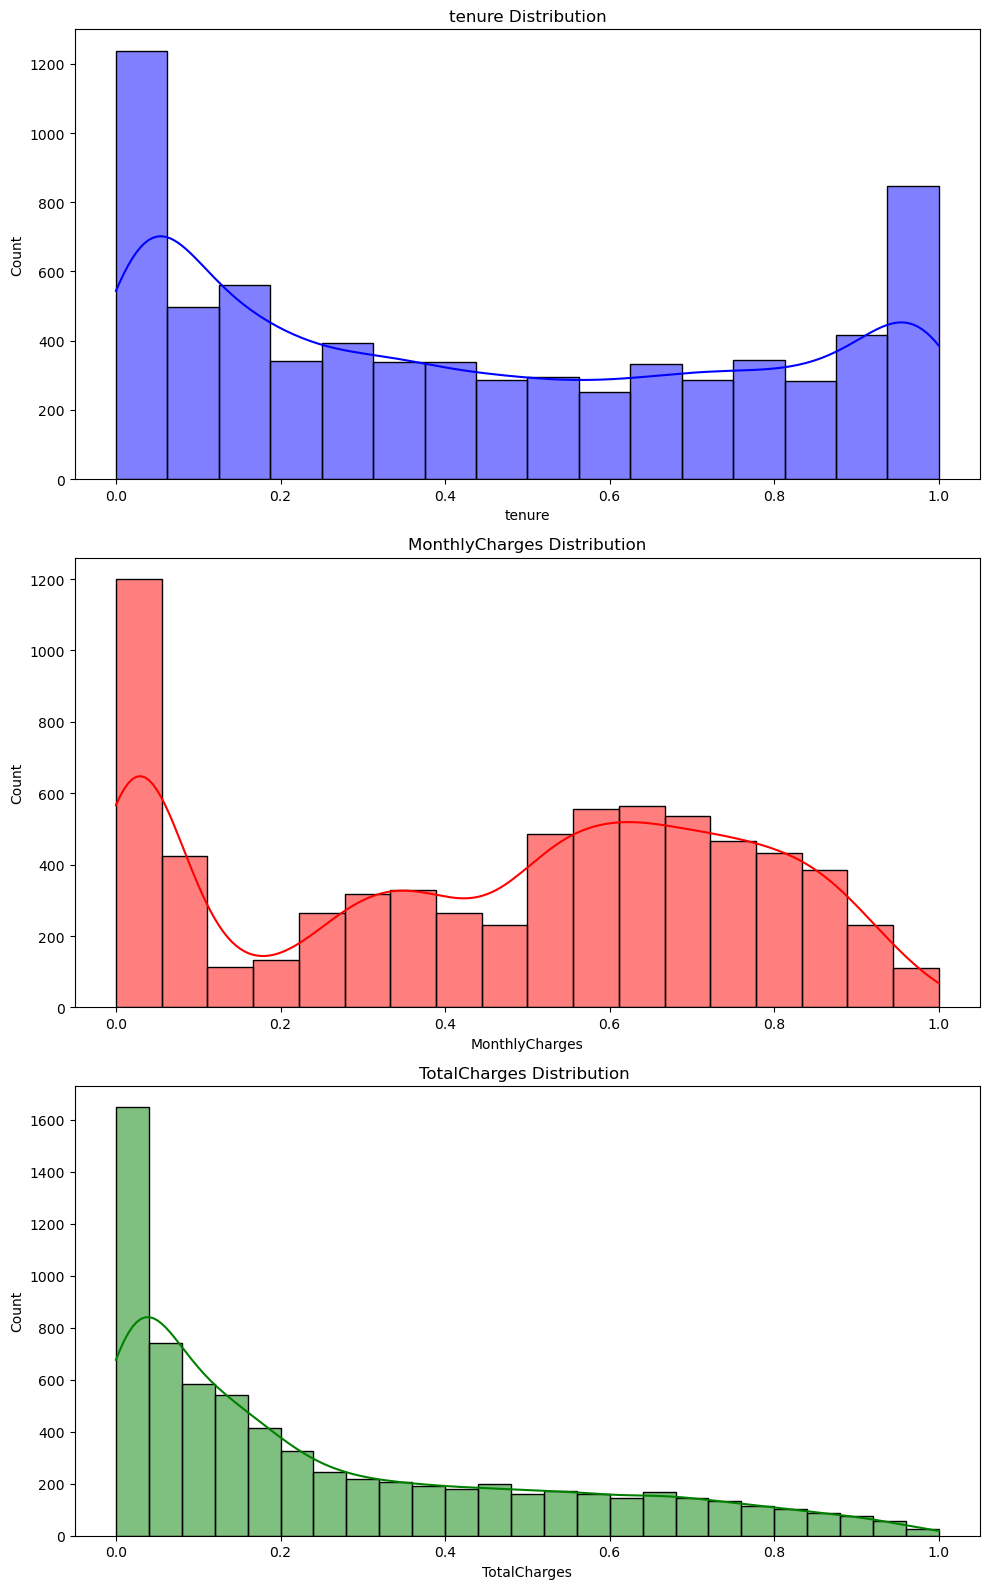

In [186]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
sns.histplot(x=df['tenure'],kde=True,color='blue')
plt.title('tenure Distribution')
plt.subplot(3,1,2)
sns.histplot(x=df['MonthlyCharges'],kde=True,color='Red')
plt.title('MonthlyCharges Distribution')
plt.subplot(3,1,3)
sns.histplot(x=df['TotalCharges'],kde=True,color='Green')
plt.title('TotalCharges Distribution ')
plt.tight_layout()
plt.show()

-  **Tenure Distribution**-A large number of customers have tenure close to 0 months, indicating many new or short-term customers.
Another peak is observed around the 70-month tenure, suggesting a loyal group of long-term customers.\
-  **Monthly Charges Distribution**- A significant proportion of customers pay around $20- $30 (dollar)per month, but there’s a steady increase in counts around $70- $100 monthly charges. Very few customers are seen paying above $100 per month, making higher charges less common.

- **Total Charges Distribution**-A large number of customers have low total charges, likely due to their shorter tenure.
As total charges increase, the number of customers steadily decreases, with very few customers in the $6,000–$8,000 (dollar)range.

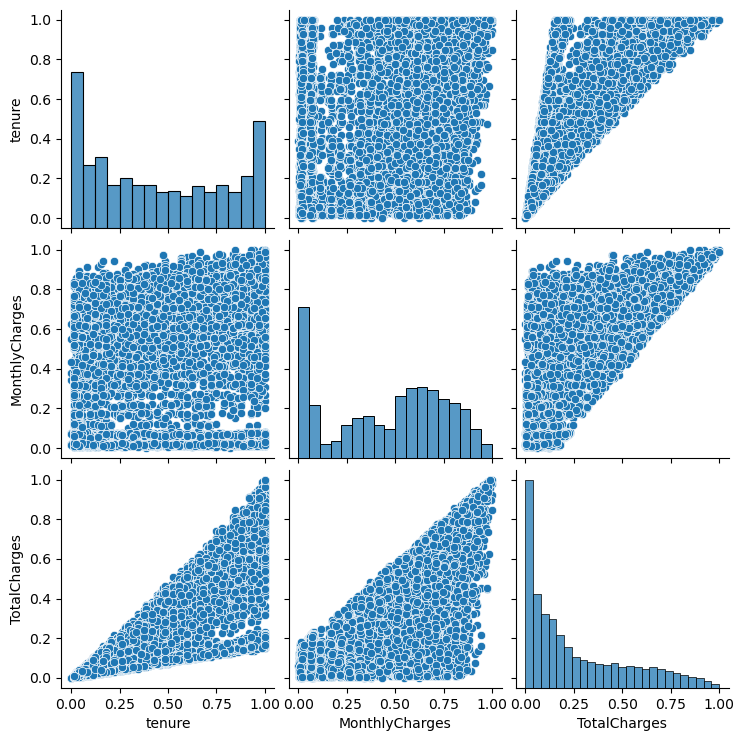

In [190]:
# Pairplot to show relationships between all continuous variables
sns.pairplot(df[continous])
plt.show()

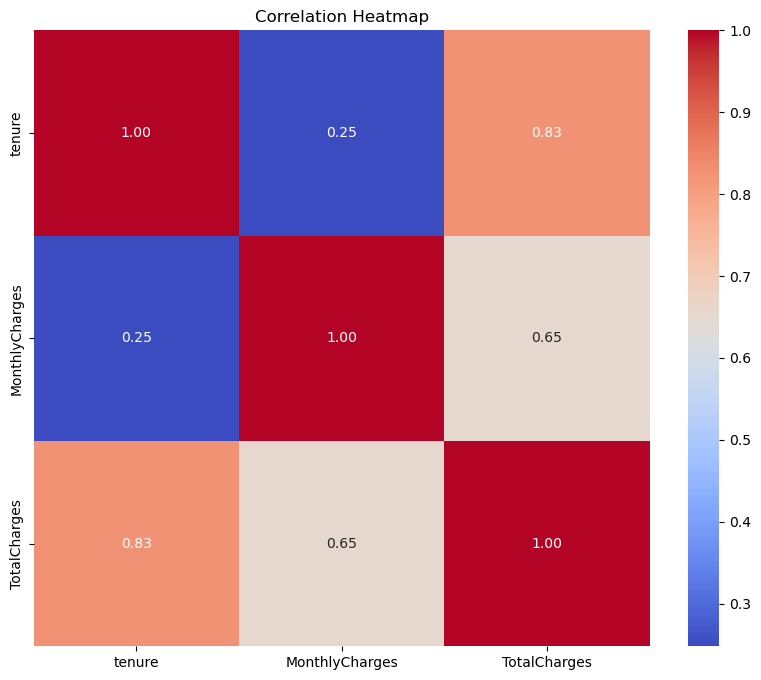

In [191]:
# Heatmap of Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[continous].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()


- Tenure and TotalCharges: Strong positive correlation (0.83)
- MonthlyCharges and TotalCharges: Moderate correlation (0.651)
- Tenure and MonthlyCharges: Weak correlation (0.25)

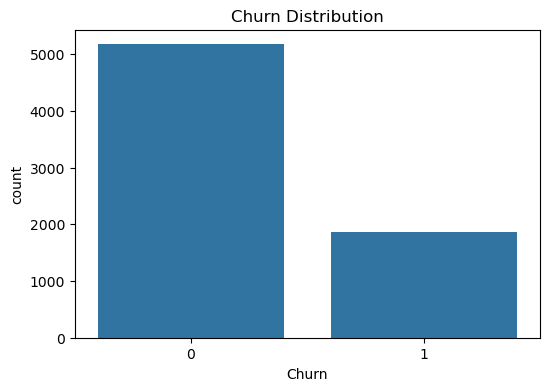

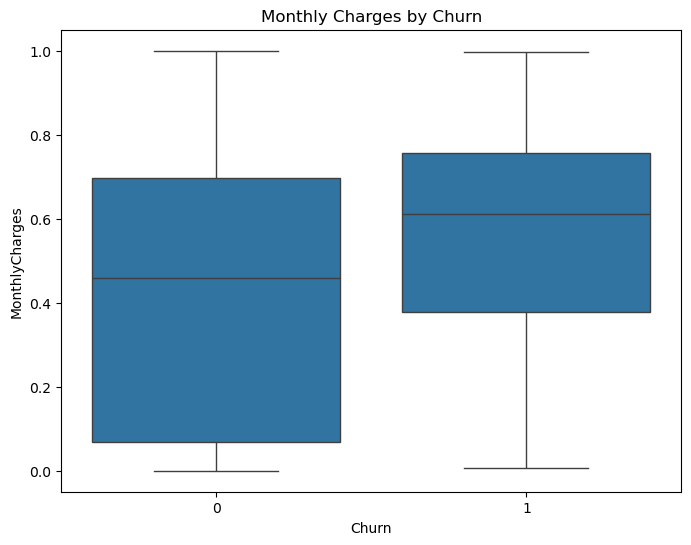

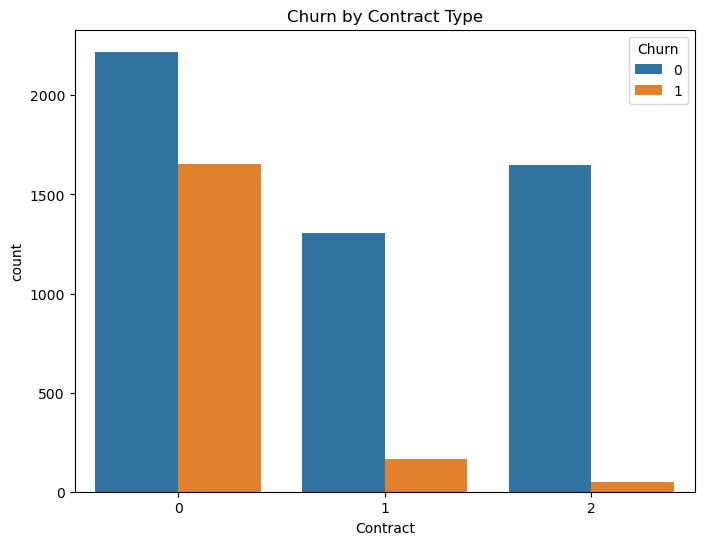

In [195]:
# Visualize Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# Distribution of Monthly Charges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.show()

# Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()



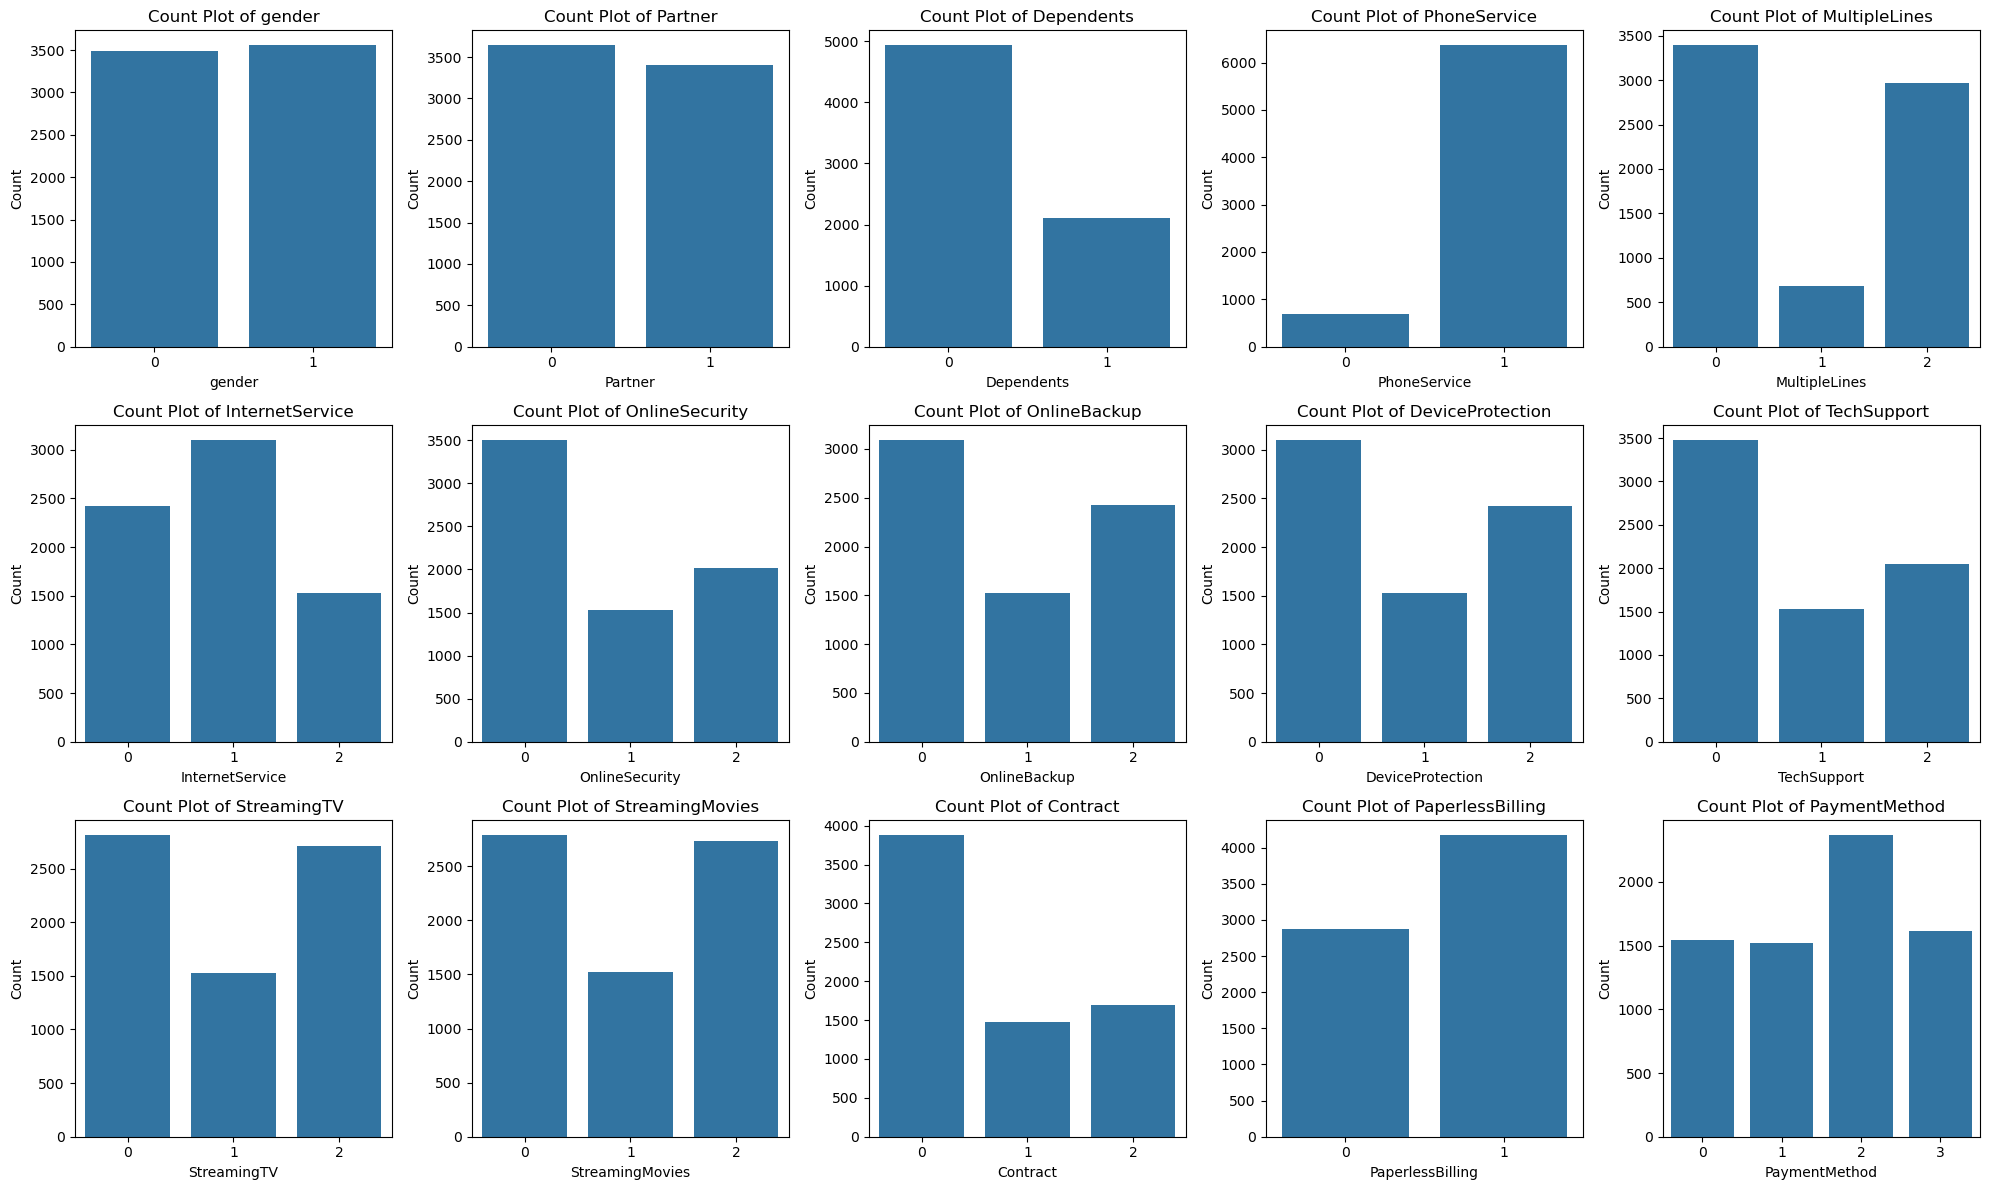

In [358]:
# List of categorical variables
categorical_variables = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]
# Set up the subplots (adjust the number of rows and columns to your preference)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))  # 3 rows, 5 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration
# Loop through the categorical variables and create a count plot for each
for i, var in enumerate(categorical_variables):
    sns.countplot(data=df, x=var, ax=axes[i])  # Assign each plot to its subplot
    axes[i].set_title(f"Count Plot of {var}")  # Set the title
    axes[i].set_xlabel(var)  # Set the x-axis label
    axes[i].set_ylabel('Count')  # Set the y-axis label

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

# Handling Class Imbalance data

In [198]:
X=df.drop('Churn',axis=1)
Y= df['Churn']

In [200]:
X=df.drop('Churn',axis=1)
Y= df['Churn']
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(random_state=42)
# Fit and resample the data
X_new, Y_new = smote.fit_resample(X,Y)

# Print the shapes to confirm resampling
print("Original dataset shape:", X.shape)
print("Resampled dataset shape:", X_new.shape)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:")
print(Y_new.value_counts())

Original dataset shape: (7043, 19)
Resampled dataset shape: (10348, 19)
Class distribution after SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [202]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,train_size=0.8,random_state=42)

# logistic Regression

In [218]:
#Modelling
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
#Evaluation
Ypred_train=log_model.predict(X_train)
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(Y_train,Ypred_train))
from sklearn.model_selection import cross_val_score
print('CV Score:',cross_val_score(log_model,X_train,Y_train,cv=5,scoring='accuracy').mean())
#predict & Evaluation on test data
Ypred_test=log_model.predict(X_test)
print('test accuracy:',accuracy_score(Y_test,Ypred_test))

train accuracy: 0.7843682048804059
CV Score: 0.7803827517258491
test accuracy: 0.7922705314009661


In [220]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Ypred_test))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Ypred_test))

[[750 271]
 [159 890]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1021
           1       0.77      0.85      0.81      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



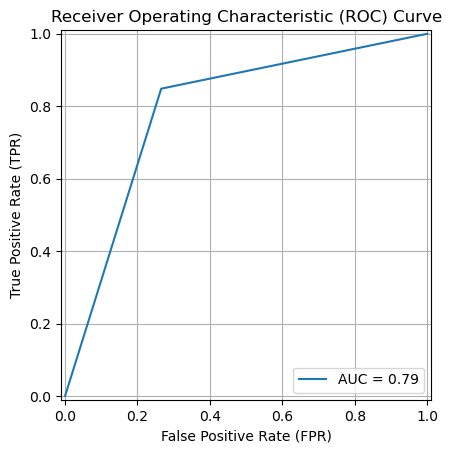

In [222]:
# Calculate the ROC curve and AUC
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(Y_test, Ypred_test)  # Ensure Ypred_test is probabilities, not class labels
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Add labels, title, and grid
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)

# Show the plot
plt.show()

# SVM

In [230]:
#Hyperparameter tunning
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmod','poly']}
from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,Y_train)
svm_grid.best_estimator_

SVC(C=1)

In [236]:
#Modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(X_train,Y_train)
#Prediction
Ypred_train_svm=svm_model.predict(X_train)
#Evaluation
print('train_accuracy:',accuracy_score(Y_train,Ypred_train_svm))
#crossvalidation
print('CV score:',cross_val_score(svm_model,X_train,Y_train,cv=5,scoring='accuracy').mean())
#test Data
#prediction
Ypred_test_svm = svm_model.predict(X_test)
print('Test Accuracy:',accuracy_score(Y_test,Ypred_test_svm))

train_accuracy: 0.8079246194733027
CV score: 0.7876327772669556
Test Accuracy: 0.808695652173913


In [242]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Ypred_test_svm))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Ypred_test_svm))

[[769 252]
 [144 905]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.80      1021
           1       0.78      0.86      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



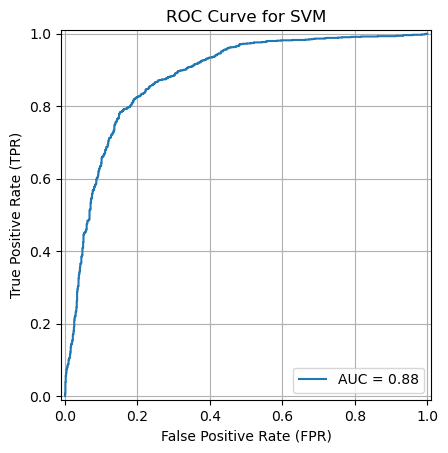

In [232]:
svm_model = SVC(probability=True)  # Ensure probability=True for predict_proba to work
svm_model.fit(X_train, Y_train)

# Get predicted probabilities for the positive class (class 1)
Ypred_test_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, Ypred_test_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Add labels, title, and grid
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)

# Show the plot
plt.show()

# Decision Tree

In [81]:
# for maximum depth to find dT model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=True)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=True)

In [246]:
#Hyperparameter tunning
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=True)
param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,20))}
dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,Y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=True)

In [247]:
#Important features
feats_ab=pd.DataFrame(data=dt.feature_importances_,index=X_new.columns,columns=['Importance'])
feats_ab
important_features_dt= feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [248]:
#selection train & test data
X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

#Modelling
dt=dt_grid.best_estimator_
dt.fit(X_train_dt,Y_train)
#Evaluation
Ypred_train_dt=dt.predict(X_train_dt)
Ypred_test_dt=dt.predict(X_test_dt)
print('train accuracy:',accuracy_score(Y_train,Ypred_train_dt))
print('cv score:',cross_val_score(dt,X_train_dt,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(Y_test,Ypred_test_dt))

train accuracy: 0.8183136023194009
cv score: 0.7807449246172483
test accuracy: 0.7995169082125604


In [249]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Ypred_test_dt))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Ypred_test_dt))

[[740 281]
 [134 915]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1021
           1       0.77      0.87      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



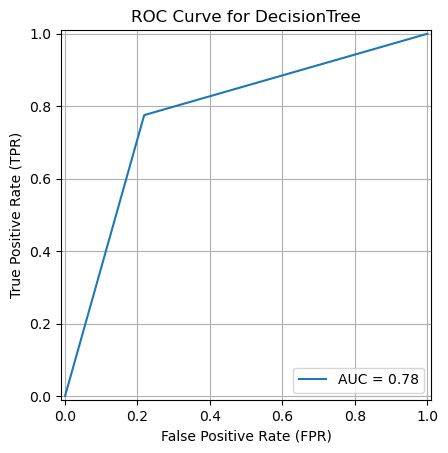

In [250]:
dt_model = DecisionTreeClassifier(random_state=42)  # Ensure probability=True for predict_proba to work
dt_model.fit(X_train, Y_train)

# Get predicted probabilities for the positive class (class 1)
Ypred_test_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, Ypred_test_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Add labels, title, and grid
plt.title('ROC Curve for DecisionTree')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)

# Show the plot
plt.show()

# Random Forest

In [256]:
#Hyperparameter
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,51))}
rfc_grid =GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rfc_grid.fit(X_train,Y_train)
rf=rfc_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=46, random_state=True)

In [257]:
#Important features
imp_feat=pd.DataFrame(data=rf.feature_importances_,index=X_new.columns,columns=['Importance'])
important_feature_rf = imp_feat[imp_feat['Importance']>0].index.tolist()
important_feature_rf

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [258]:
#selection train & test data
X_train_rf=X_train[important_feature_rf]
X_test_rf=X_test[important_feature_rf]
#Modelling
rf=rfc_grid.best_estimator_
rf.fit(X_train_rf,Y_train)
#Evaluation
Ypred_train_rf=rf.predict(X_train_rf)
Ypred_test_rf=rf.predict(X_test_rf)
print('train accuracy:',accuracy_score(Y_train,Ypred_train_rf))
print('cv score:',cross_val_score(rf,X_train_rf,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(Y_test,Ypred_test_rf))

train accuracy: 0.998550374486591
cv score: 0.8224215888027789
test accuracy: 0.842512077294686


In [259]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Ypred_test_rf))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Ypred_test_rf))

[[839 182]
 [144 905]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1021
           1       0.83      0.86      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



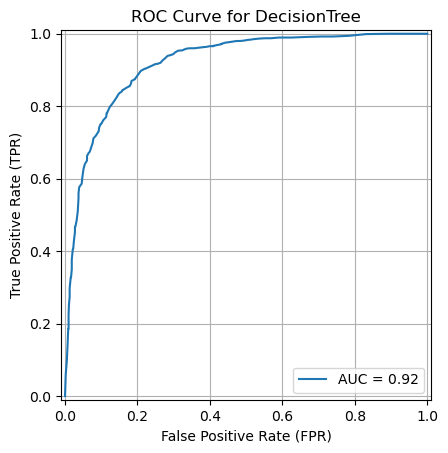

In [264]:
rf_model = RandomForestClassifier(random_state=42)  # Ensure probability=True for predict_proba to work
rf_model.fit(X_train, Y_train)

# Get predicted probabilities for the positive class (class 1)
Ypred_test_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, Ypred_test_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Add labels, title, and grid
plt.title('ROC Curve for DecisionTree')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)

# Show the plot
plt.show()

# Gradient Boost 

In [266]:
#Hyperparameter
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,20)),
            'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,Y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.4, n_estimators=18,
                           random_state=True)

In [267]:
# importance feature
feats_gb= pd.DataFrame(data= gb.feature_importances_,index=X_new.columns,columns=['Importance'])
important_features_gb=feats_gb[feats_gb['Importance']>0].index.tolist()
important_features_gb

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [268]:
#selection train & test data
X_train_gb=X_train[important_features_gb]
X_test_gb=X_test[important_features_gb]
#Modelling
gb=gb_grid.best_estimator_
gb.fit(X_train_gb,Y_train)
#Evaluation
Ypred_train_gb=gb.predict(X_train_gb)
Ypred_test_gb= gb.predict(X_test_gb)
print('Trainaccuracy:',accuracy_score(Y_train,Ypred_train_gb))
print('CV score:',cross_val_score(gb,X_train_gb,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy;',accuracy_score(Y_test,Ypred_test_gb))

Trainaccuracy: 0.8094950471128292
CV score: 0.7958451917042486
test accuracy; 0.8096618357487922


In [269]:
# classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Ypred_test_gb))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Ypred_test_gb))

[[778 243]
 [151 898]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1021
           1       0.79      0.86      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



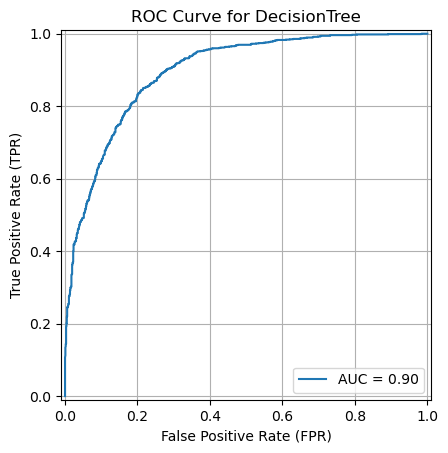

In [274]:
gb_model = GradientBoostingClassifier(random_state=42)  # Ensure probability=True for predict_proba to work
gb_model.fit(X_train, Y_train)

# Get predicted probabilities for the positive class (class 1)
Ypred_test_prob = gb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, Ypred_test_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Add labels, title, and grid
plt.title('ROC Curve for DecisionTree')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)

# Show the plot
plt.show()

# Save Best Model

In [279]:
from joblib import dump
dump(gb,'Telco_Customer_Churn_model.joblib')

['Telco_Customer_Churn_model.joblib']

In [281]:
from pickle import dump
dump(gb,open('Telco_Customer_Churn_model','wb'))

# predict on new data


In [339]:
# Example new customer
new_customer = {
    'customerID': '7590-VHVEG',
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 1397.45
}

import pandas as pd

# Convert to a DataFrame
new_customer_df = pd.DataFrame([new_customer])


In [341]:
# Drop Unimportant columns
new_customer_df = new_customer_df.drop(columns=['customerID'])

In [343]:
# labelEncoder
categorical_variable=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
'OnlineBackup','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
# Apply Label Encoding to each column in Discreate_categorical
for column in categorical_variable:
    new_customer_df [column] = label_encoder.fit_transform(new_customer_df [column])

In [345]:
# Feature Scaling
continous=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[continous] = scaler.fit_transform(df[continous])

In [347]:
# Convert the preprocessed DataFrame to a NumPy array
X_new = new_customer_df.values

# Predict churn class
predicted_class = gb.predict(X_new)  # Replace `trained_model` with your actual model
predicted_probability = gb.predict_proba(X_new)

# Display the results
print("Predicted Churn Class (0 = No Churn, 1 = Churn):", predicted_class[0])
print("Predicted Churn Probability (No Churn, Churn):", predicted_probability[0])

Predicted Churn Class (0 = No Churn, 1 = Churn): 1
Predicted Churn Probability (No Churn, Churn): [0.23775836 0.76224164]
